In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *
from astropy.coordinates import angular_separation

## Select the CTA location and time of observation

In [3]:
time='2020-02-08T22:00'
div=0.0043
name='pollux'

In [4]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T22:00:00.000


<AltAz Frame (obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [5]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [6]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [7]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (85.65446693, 67.11281857)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


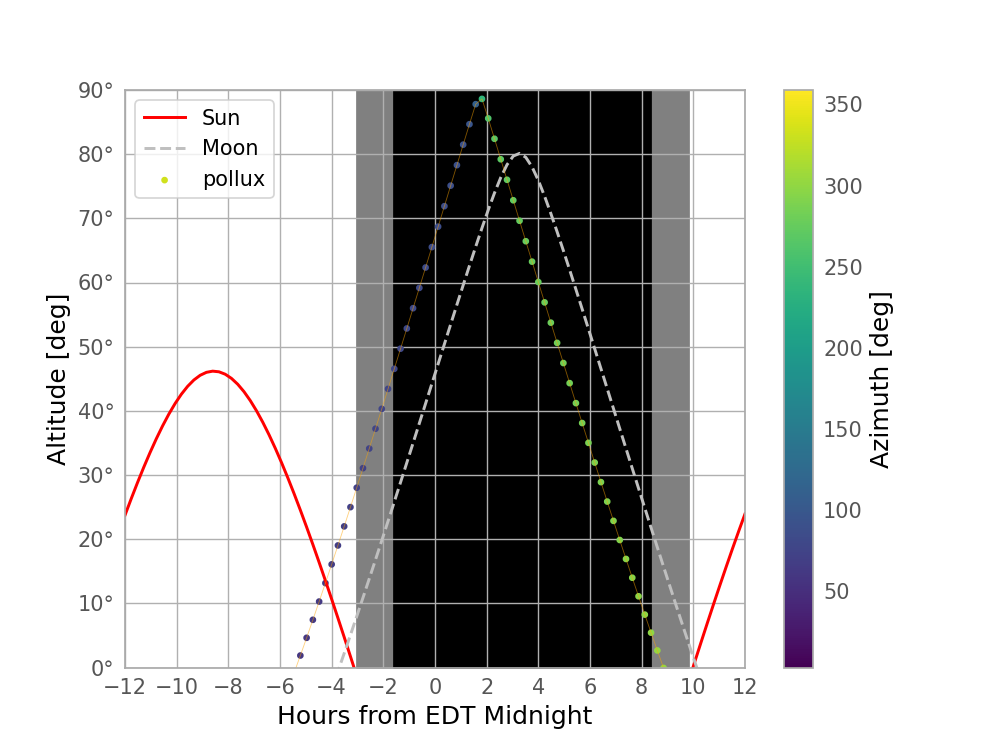

In [8]:
cta.navigation_plot(label = name)
#plt.savefig(f'navigation_{name}_{time}.png')
plt.show()

## Load array and pointing to a source

In [10]:
array =  LoadConfig("./MAGIC_LST1_div/layout_MAGIC_LST1_prod5.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-8.09,77.13,43.0,85.654,67.113,22.887,28.000,2.150,14.536,0.029,-0.388,0.921,77.55
2,39.3,-62.55,41.25,85.654,67.113,22.887,16.970,1.750,9.627,0.029,-0.388,0.921,73.88
3,-31.21,-14.57,42.42,85.654,67.113,22.887,16.970,1.750,9.627,0.029,-0.388,0.921,34.45


## Activate the divergent pointing mode

In [11]:
array.divergent_pointing(div) #0.01453   0.0043

In [12]:
array.hFoV(m_cut=0)

<Quantity 14.4986954 deg2>

In [13]:
np.sqrt(array.hFoV(m_cut=0)/np.pi)

<Quantity 2.14827328 deg>

In [14]:
array.hFoV(m_cut=2,return_multiplicity=True)

(<Quantity 11.13271303 deg2>, 2.325040562466194, 0.6837044003999869)

<IPython.core.display.Javascript object>


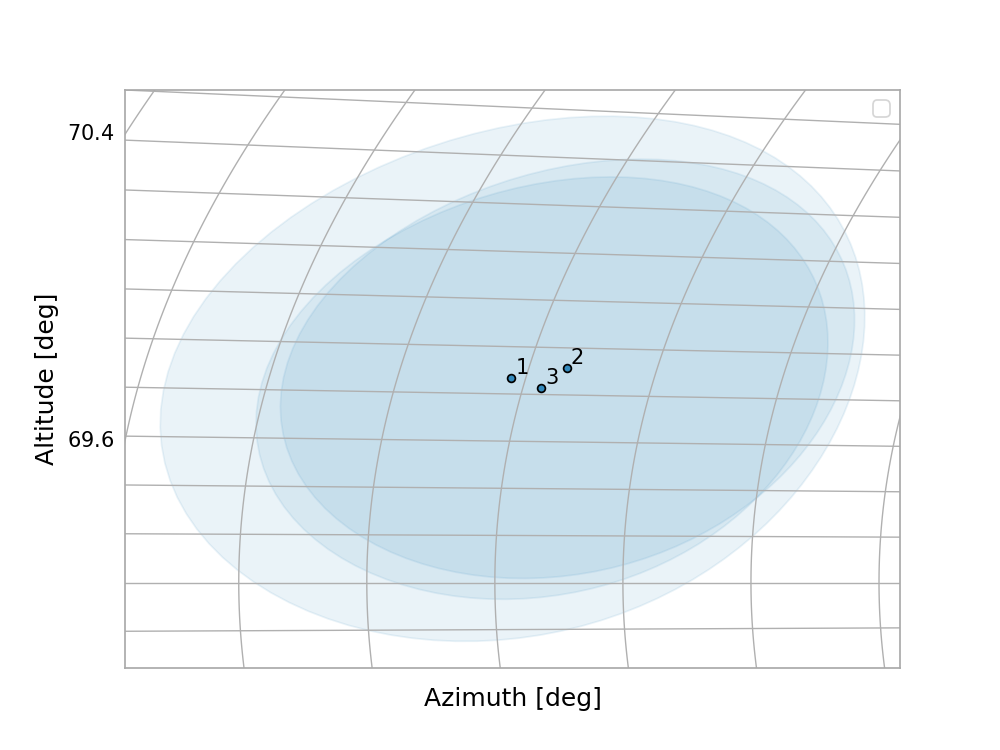

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [15]:
array.skymap_polar()

In [16]:
#array.pointing

In [17]:
#array.multiplicity_plot()

In [18]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)
initial_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.12962998, 28.0455039 ), (116.50979927, 28.089047  ),
     (116.34705361, 27.94375785)]>

In [19]:
#22:00 pointing directions icrs
r1=[(116.24280807, 28.03457869), (116.40720266, 28.05342954),
     (116.33678956, 27.99053461)]*u.deg

In [20]:
#22:20 pointing directions icrs
r2=[(116.24001511, 28.03139772), (116.40793061, 28.05628491),
     (116.33887332, 27.99085672)]*u.deg

In [43]:
tel_id=0

In [44]:
print(angular_separation(r1[tel_id][0],r1[tel_id][1],r2[tel_id][0],r2[tel_id][1]).to(u.deg))

0.004024448446890288 deg


In [23]:
pointing_start_altaz=array.get_pointing_coord(icrs=False)
pointing_start_altaz

<SkyCoord (AltAz: obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(85.66866957, 67.28973391), (85.43781458, 66.96356306),
     (85.85832974, 67.08526723)]>

In [24]:
star.transform_to(cta.altaz)

<SkyCoord (AltAz: obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (85.65446693, 67.11281857)>

In [ ]:
#div0.0043 [(85.66866957, 67.28973391), (85.43781458, 66.96356306),(85.85832974, 67.08526723)]*u.deg

In [45]:
v1= [(85.66058037, 67.18928953), (85.5603695 , 67.04825474),
    (85.74271636, 67.10093158)]*u.deg
v2=(85.65446693, 67.11281857)*u.deg
for i in range(0,3):
    print(angular_separation(v1[i][0],v1[i][1],v2[0],v2[1]).to(u.deg))

0.07650779667620007 deg
0.07423841260867801 deg
0.036329928491720724 deg


## Shifting the observation time and check how it change

In [26]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 20*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T22:00:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.1607829, -1718.7370058, 3051.71504125) km
Observation time :  2020-02-08T22:20:00.000


In [27]:
array.hFoV(m_cut=2)

<Quantity 11.41057219 deg2>

In [28]:
initial_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.12962998, 28.0455039 ), (116.50979927, 28.089047  ),
     (116.34705361, 27.94375785)]>

In [29]:
final_pointing_dir=array.get_pointing_coord(icrs=True)
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.12320402, 28.03813774), (116.51151051, 28.09565146),
     (116.35186868, 27.94450091)]>

In [30]:
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(116.12320402, 28.03813774), (116.51151051, 28.09565146),
     (116.35186868, 27.94450091)]>

In [31]:
array.pointing

{'az': <Quantity 87.3587194 deg>,
 'alt': <Quantity 71.49960533 deg>,
 'ra': <Quantity 116.32895777 deg>,
 'dec': <Quantity 28.02619889 deg>}

<IPython.core.display.Javascript object>


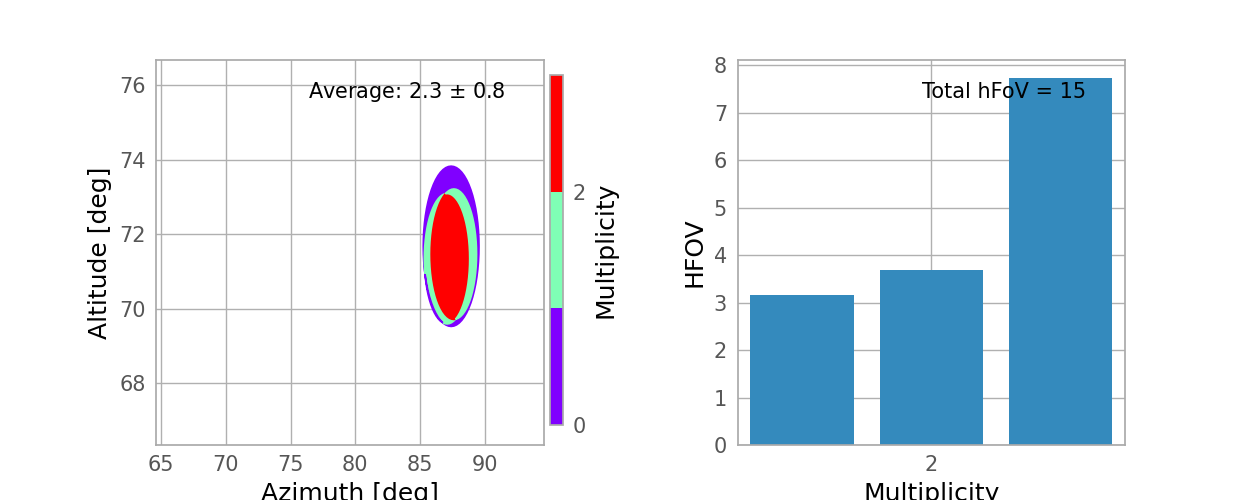

In [32]:
array.multiplicity_plot()

In [33]:
cta.altaz

<AltAz Frame (obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [34]:
final_pointing=initial_pointing_dir.transform_to(cta.altaz)
final_pointing

<SkyCoord (AltAz: obstime=2020-02-08T22:00:00.000, location=(5327160.78289948, -1718737.0057997, 3051715.04125465) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(85.66866957, 67.28973391), (85.43781458, 66.96356306),
     (85.85832974, 67.08526723)]>

## Get parameters (hFoV, alt, and m) as a function of time

In [35]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


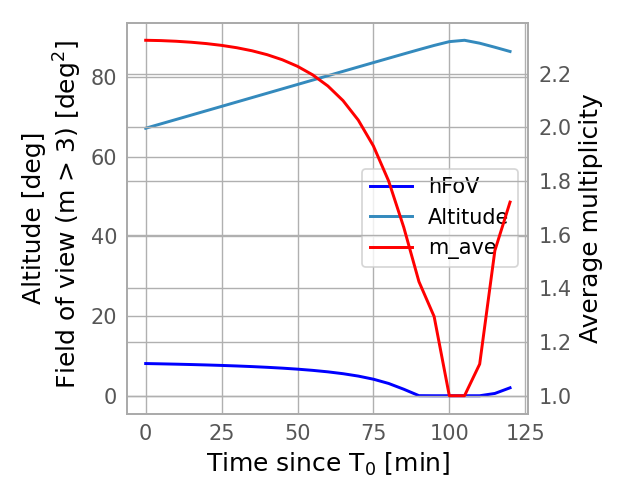

In [37]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
#plt.savefig(f'evolution_{name}_{time}_{div}.png')

In [38]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (116.32895777, 28.02619889)>

In [39]:
diff=[]
for i in range(len(initial_pointing_dir)):
    diff.append([initial_pointing_dir[i].ra-final_pointing_dir[i].ra,initial_pointing_dir[i].dec-final_pointing_dir[i].dec])

In [40]:
diff

[[<Angle 0.00642596 deg>, <Angle 0.00736616 deg>],
 [<Angle -0.00171124 deg>, <Angle -0.00660446 deg>],
 [<Angle -0.00481507 deg>, <Angle -0.00074306 deg>]]